In [20]:
# Loading Python libraries

# Data manipulation libraries
import numpy as np
import pandas as pd

# Machine learning libraries

# Metrics
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, precision_score, recall_score, classification_report
from sklearn.metrics import roc_curve, f1_score, roc_auc_score, matthews_corrcoef, confusion_matrix

# Data pre-processing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_predict

# Regression models
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm

# VIF (variance inflation factor)
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Random Forests
from sklearn.ensemble import RandomForestClassifier

# Plotting libraries
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline
from matplotlib.pylab import rcParams
from IPython.display import Image

# Plotly
import plotly as py
import plotly.graph_objects as go
import plotly_express as px

# Web libraries
import requests

## Breast Cancer Wisconsin data

### Introduction

We will be working with the Breast Cancer Wisconsin dataset, which contains 569 samples of __malignent__ and __benign__ tumor cells. The first column in the data set stores unique ID numbers of the samples and the second column the diagnosis (malignant and benign) of the samples. The remaining columns contain the corresponding real-value features that have been computed from digitized images of the cell nuclei, which can be used to build a model to predict whether a tumor is benign or malignant. 

For more informationa and data accession please follow to: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)

### 1. Load and inspect data

In [2]:
# Load the dataset using pandas
df = pd.read_csv(
    "https://archive.ics.uci.edu/ml/machine-learning-databases/" \
        "breast-cancer-wisconsin/wdbc.data",
    header=None
)

In [3]:
# Explore the values
df.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
# Number of rows and columns
df.shape

(569, 32)

In [5]:
# Check number of columns with missing data (NaN)
df.isnull().any().sum()

0

In [6]:
# Unpack df into three seperate numpy arrays cotaining IDs, diagnosis (malignant and benign) and feature columns
ids, diagnosis, *features = df.T.to_numpy()

In [7]:
# With *features a list is created. Convert to numpy array. 
features = np.asarray(features, dtype=np.float64).T
features[:5,:5]

array([[1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, 1.326e+03, 8.474e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, 1.203e+03, 1.096e-01],
       [1.142e+01, 2.038e+01, 7.758e+01, 3.861e+02, 1.425e-01],
       [2.029e+01, 1.434e+01, 1.351e+02, 1.297e+03, 1.003e-01]])

In [8]:
# Check ids array
ids[:5]

array([842302, 842517, 84300903, 84348301, 84358402], dtype=object)

In [9]:
# Check diagnosis array
diagnosis[:5]

array(['M', 'M', 'M', 'M', 'M'], dtype=object)

In [10]:
# Number of rows and columns in features array
features.shape

(569, 30)

In [11]:
# Convert features array into df
df_feat = pd.DataFrame(data=features[0:,0:],
    index=[i for i in range(features.shape[0])], 
    columns=['f'+str(i) for i in range(features.shape[1])])

df_feat.head()

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### 2 Check for independence between the predictor variables
Check there is only little or no multicollinearity between the predictor variables by calculating the variance inflation factor (VIF)

In [12]:
# Function to calculate variance infaltion facotr (VIF) for each predictor variable
def calc_vif(X):
    # Add a column with a constant that functions as the intercept
    X = add_constant(X)

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [14]:
# Calculate VIF for predictor variables in data set
calc_vif(df_feat).sort_values(by = 'VIF').head(8)

,variables,VIF
15,f14,4.027923
12,f11,4.205423
9,f8,4.220656
19,f18,5.175426
5,f4,8.194282
29,f28,9.520570
20,f19,9.717987
25,f24,10.923061


A VIF exceeding 5 indicates high multicollinearity between a given variable and the others. In this data set there are only three variables with a VIF =< 5. Presumably this number of explanatory variables would not be sufiencent to train the model. Alternatively, find highly correlating feature pairs usign the Pearson correlation.

In [15]:
# Calculate Pearson correlations between each feature pair
corr = df_feat.corr()
corr.head()

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29
f0,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
f1,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
f2,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
f3,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
f4,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316


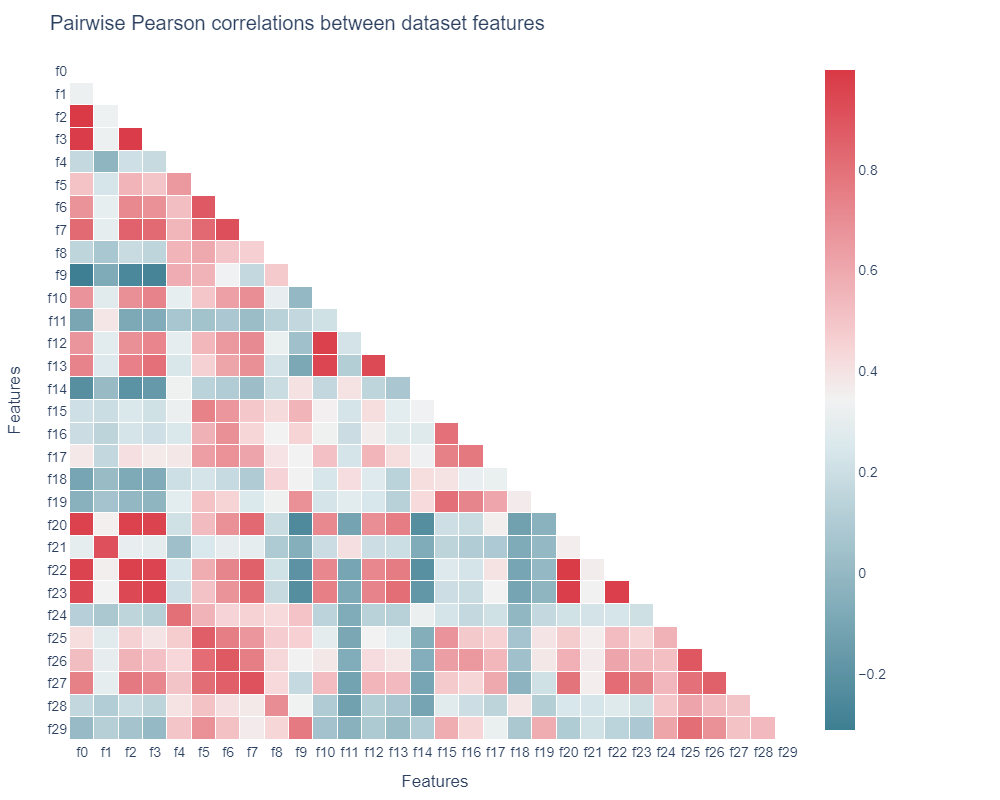

In [23]:
# Plot Pearson correlation matrix of feature pairs with plotly

# Define colorscale
sns_colorscale = [[0.0, '#3f7f93'], #cmap = sns.diverging_palette(220, 10, as_cmap = True)
 [0.071, '#5890a1'],
 [0.143, '#72a1b0'],
 [0.214, '#8cb3bf'],
 [0.286, '#a7c5cf'],
 [0.357, '#c0d6dd'],
 [0.429, '#dae8ec'],
 [0.5, '#f2f2f2'],
 [0.571, '#f7d7d9'],
 [0.643, '#f2bcc0'],
 [0.714, '#eda3a9'],
 [0.786, '#e8888f'],
 [0.857, '#e36e76'],
 [0.929, '#de535e'],
 [1.0, '#d93a46']]

# Mask upper triangular part
mask = np.zeros_like(corr, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True
corr_mask=corr.mask(mask)

# Defining data
trace = go.Heatmap(
    z=corr_mask,
    x=corr_mask.columns,
    y=corr_mask.columns,
    xgap=1, ygap=1,
    colorscale=sns_colorscale,
    colorbar_thickness=30,
    colorbar_ticklen=3
)

data = [trace]
# defining layout
layout = go.Layout(
    title='Pairwise Pearson correlations between dataset features',
    xaxis=dict(title='Features'),
    yaxis=dict(title='Features'),
    font=dict(family='Arial', size=18),
    margin=dict(b=60, l=70, r=200, t=60, pad=2, autoexpand=True),
    width=1000,
    height=800,
    xaxis_showgrid=False,
    yaxis_showgrid=False,
    yaxis_autorange='reversed',
    plot_bgcolor='white'
)

# For interactive figure
# fig = go.Figure(data=data, layout=layout)
# fig.show("svg")

# For plotting static figure
img_bytes = fig.to_image(format="png", width=1000, height=800, scale=1)
Image(img_bytes)

There are some feature pairs with high correlation coeficients. These would be easier to identify by having a list of feature pairs sorted by their respective correlation coeficients. 

In [24]:
# Function which takes a correlation matrix in form of a df as argument
# Returns a new df, listing correlation pairs across the whole matrix
# in the order of highest to lowest correlation coeficient
def corrank(X):
    import itertools
    df = pd.DataFrame([[str((i,j)),X.corr().loc[i,j]] for i,j in list(itertools.combinations(X.corr(), 2))],columns = ['Feature Pairs','Pearson correlation'])
    return df.sort_values(by = 'Pearson correlation',ascending = False)

In [25]:
# Create df with feature pairs sorted from highest to lowest correlation coeficient
feature_hi_pair = corrank(df_feat)
feature_hi_pair.head()

,Feature Pairs,Pearson correlation
1,"('f0', 'f2')",0.997855
391,"('f20', 'f22')",0.993708
2,"('f0', 'f3')",0.987357
57,"('f2', 'f3')",0.986507
392,"('f20', 'f23')",0.984015


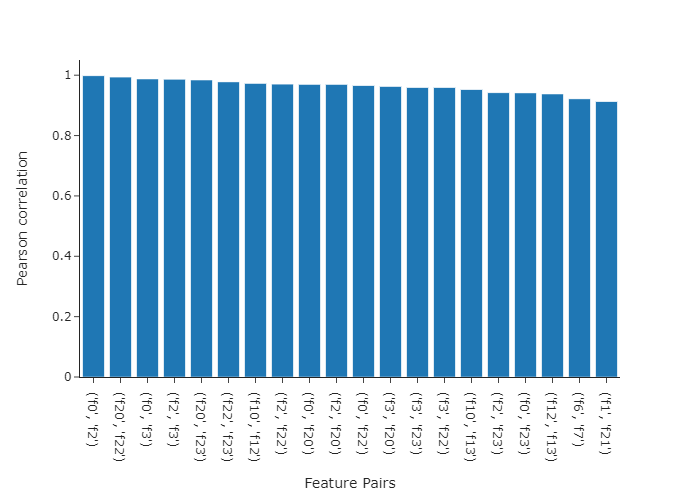

In [26]:
# Plot Pearson correlations for the feature pairs with the top twenty pearson correlations using plotly express
fig = px.bar(feature_hi_pair[:20], x='Feature Pairs', y='Pearson correlation', orientation='v', template='simple_white')

# For plotting interactive figure
# fig.show()

# For plotting static figure
img_bytes = fig.to_image(format="png", scale=1)
Image(img_bytes)

In [27]:
# Remove the variables causing high multicollinearity between feature pairs
df_feat_indpdt = df_feat.drop(['f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f10', 'f12', 'f15', 'f20', 'f22', 'f23', 'f25', 'f27'], axis=1)

In [28]:
# Create df with feature pairs sorted from highest to lowest correlation coeficient
feature_low_pair = corrank(df_feat_indpdt)

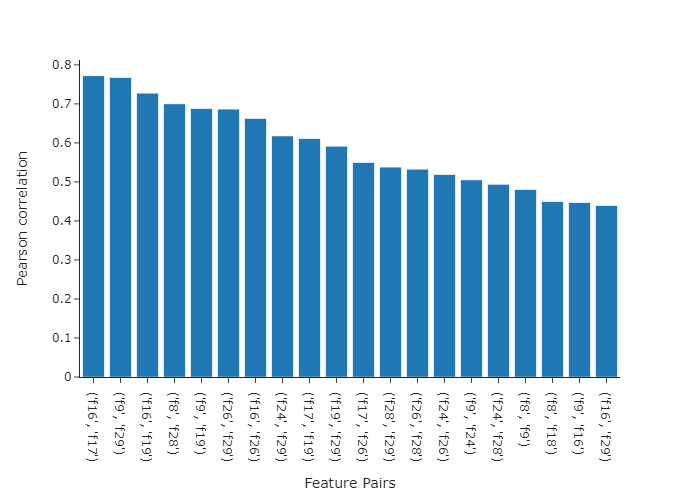

In [29]:
# Plot Pearson correlations for the feature pairs with the top twenty pearson correlations using plotly express
# Correlation should be <= 0.8
fig = px.bar(feature_low_pair[:20], x='Feature Pairs', y='Pearson correlation', orientation='v', template='simple_white')

# For plotting interactive figure
# fig.show()

# For plotting static figure
img_bytes = fig.to_image(format="png", scale=1)
Image(img_bytes)

### 3. Scale explanatory variables and encode target variable

Encode diagnosis labels as 0 or 1 to be used for statistical modelling approaches.

In [30]:
# Transform df with selected features into numpy array
features = df_feat_indpdt.to_numpy()
features.shape

(569, 14)

In [31]:
# Scale predictors
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [32]:
# Transform categorical variables (B and M) to numerical
diagnosis_encode = LabelEncoder().fit_transform(diagnosis)
diagnosis_encode[:25]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1])

### 4. Preparation of training and test datasets

Prepare training and test datasets using sklearn by controlling the ratio of splitting.

In [33]:
# Define the proportion between training and test datasets
proportion = 0.2

# Split the dataset
X_train, X_test, y_train, y_test = \
    train_test_split(features_scaled, diagnosis_encode, test_size=proportion, random_state=1) 

In [34]:
# Original data size vs train vs test
features_scaled.shape, X_train.shape, X_test.shape

((569, 14), (455, 14), (114, 14))

### 5. Logistic regression

In [35]:
# Instantiate logistic regression model
LogReg = LogisticRegression(solver='liblinear')
# LogReg = LogisticRegression(solver='lbfgs', max_iter=10_000)
# Fit logistic regression model based on training data
LogReg.fit(X_train, y_train)
# # Predict labels based on test dataset
y_pred = LogReg.predict(X_test)

### 6. Model evaluation

In [36]:
# Classification report without cross-validation
print(classification_report(y_test, y_pred))

precision    recall  f1-score   support

           0       0.97      0.99      0.98        72
           1       0.98      0.95      0.96        42

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [37]:
# Evaluate results
mse = mean_squared_error(y_test, y_pred)
R2 = r2_score(y_test, y_pred)
Accuracy = accuracy_score(y_test, y_pred)
Precision = precision_score(y_test, y_pred)
Recall = recall_score(y_test, y_pred)
F1_score = f1_score(y_test, y_pred)

print(f"Mean squared error: {mse:.4f}")
print(f"Variance score: {R2:.4f}")
print(f"Accuracy: {Accuracy:.4f}")
print(f"Precision: {Precision:.4f}")
print(f"Recall: {Recall:.4f}")
print(f"F1 score: {F1_score:.4f}")

Mean squared error: 0.0263
Variance score: 0.8869
Accuracy: 0.9737
Precision: 0.9756
Recall: 0.9524
F1 score: 0.9639


Text(0.5, 7.0, 'Predicted\n\nAccuracy: 0.974\nPrecision: 0.976\nRecall: 0.952\nF1 Score: 0.964')

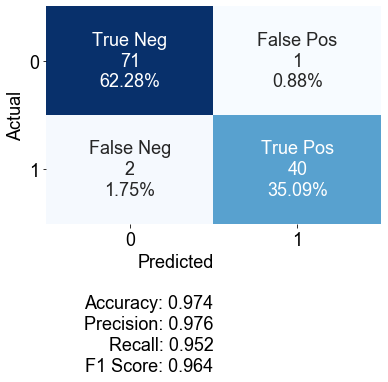

In [38]:
# Plot confusion matrix
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['font.size'] = 18

y_pred = LogReg.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred)
group_names = ["True Neg","False Pos","False Neg","True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt="", cmap='Blues', cbar=False)
plt.ylabel('Actual')
plt.yticks(rotation=0)
plt.xlabel('Predicted' + "\n\nAccuracy: {:0.3f}\nPrecision: {:0.3f}\nRecall: {:0.3f}\nF1 Score: {:0.3f}".format(Accuracy,Precision,Recall,F1_score), horizontalalignment='right')

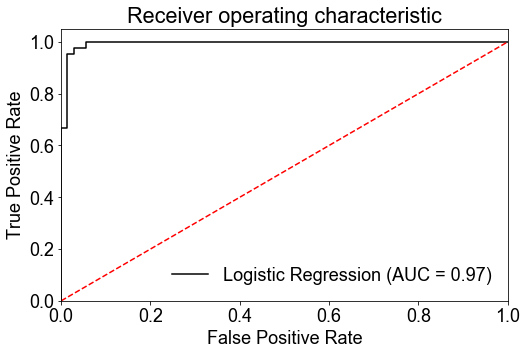

In [39]:
# Receiver operating characteristic (ROC) curve

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['font.size'] = 18

logit_roc_auc = roc_auc_score(y_test, LogReg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, LogReg.predict_proba(X_test)[:,1])
plt.figure(figsize=(8,5))
plt.plot(fpr, tpr, label='Logistic Regression (AUC = %0.2f)' % logit_roc_auc, color='k')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right", frameon=False)
plt.show()

### 7. Random Forest
In contrast to logistic regression there are no assumptions for Random Forest. Therefore all features can be used.

In [40]:
# Transform df with selected features into numpy array
features = df_feat.to_numpy()
features.shape

(569, 30)

In [41]:
# Scale predictors
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [42]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(features_scaled, diagnosis_encode, test_size=0.2, random_state=17)

In [43]:
# Instantiate a random forest object
classifier = RandomForestClassifier(oob_score = True, class_weight = "balanced", n_estimators=400, random_state=24)
# Train model
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=400,
                       n_jobs=None, oob_score=True, random_state=24, verbose=0,
                       warm_start=False)

In [44]:
# Evaluate model's predictions
# Predict y from x test data
y_pred = classifier.predict(X_test)
y_expect = y_test
print(classification_report(y_expect, y_pred))

precision    recall  f1-score   support

           0       0.97      0.97      0.97        76
           1       0.95      0.95      0.95        38

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



In [45]:
# Evaluate results
mse = mean_squared_error(y_test, y_pred)
R2 = r2_score(y_test, y_pred)
Accuracy = accuracy_score(y_test, y_pred)
Precision = precision_score(y_test, y_pred)
Recall = recall_score(y_test, y_pred)
F1_score = f1_score(y_test, y_pred)
mat_cc = matthews_corrcoef(y_test,y_pred)

print(f"Mean squared error: {mse:.4f}")
print(f"Variance score: {R2:.4f}")
print(f"Accuracy: {Accuracy:.4f}")
print(f"Precision: {Precision:.4f}")
print(f"Recall: {Recall:.4f}")
print(f"F1 score: {F1_score:.4f}")
print(f"MCC: {mat_cc:.4f}")
print(f"OOB score: {classifier.oob_score_:.4f}")

Mean squared error: 0.0351
Variance score: 0.8421
Accuracy: 0.9649
Precision: 0.9474
Recall: 0.9474
F1 score: 0.9474
MCC: 0.9211
OOB score: 0.9714


Text(0.5, 7.0, 'Predicted\n\nAccuracy: 0.965\nPrecision: 0.947\nRecall: 0.947\nF1 Score: 0.947')

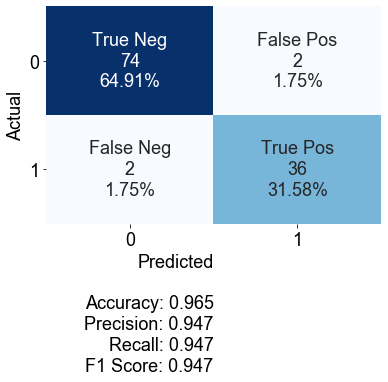

In [46]:
# Plot confusion matrix
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['font.size'] = 18

y_pred = classifier.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred)
group_names = ["True Neg","False Pos","False Neg","True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt="", cmap='Blues', cbar=False)
plt.ylabel('Actual')
plt.yticks(rotation=0)
plt.xlabel('Predicted' + "\n\nAccuracy: {:0.3f}\nPrecision: {:0.3f}\nRecall: {:0.3f}\nF1 Score: {:0.3f}".format(Accuracy,Precision,Recall,F1_score), horizontalalignment='right')

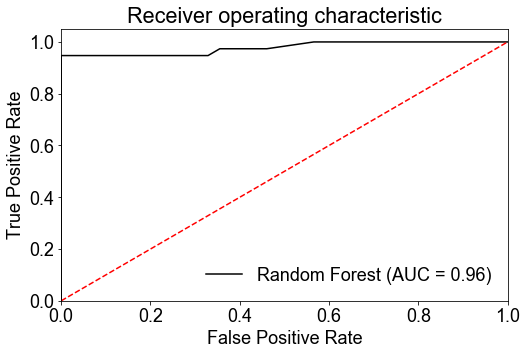

In [47]:
# Receiver operating characteristic (ROC) curve

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['font.size'] = 18

rf_roc_auc = roc_auc_score(y_test, classifier.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, classifier.predict_proba(X_test)[:,1])
plt.figure(figsize=(8,5))
plt.plot(fpr, tpr, label='Random Forest (AUC = %0.2f)' % rf_roc_auc, color='k')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right", frameon=False)
plt.show()

### 8. Conclusion
Logistic regression predicts slightly better than Random Forest